# Bernstein-Vazirani Algorithm

### Practice with Qiskit

In this notebook I will develope the Bernstein-Vazirani algorith. It is a restricted version of the Deutsch–Jozsa algorithm: instead of distinguishing between two distinct classes of functions, the algorithm tries to learn a string encoded in a function. 

If we consider a binary number of lenght $N$ and we want to know what the number is, a classical algorithm will take up to $N$ tries to extract the correct string: the B-V algorithm, instead, only needs one attempt.

In [2]:
from qiskit import *
%matplotlib inline
from qiskit.tools.visualization import plot_histogram

In [3]:
# I start declaring the number the algorithm has to discover

number = '100101'

In [8]:
# I then build the circuit: it as to contain a number of qubit equals to the lenght of the binary number +1

circuit = QuantumCircuit(7, 6)

# The 6 qubits have to be prepared in superposition using Hadamard gates; the 7th instead needs an extra x gate

circuit.h([0, 1, 2, 3, 4, 5])
circuit.x(6)
circuit.h(6)

circuit.barrier()

In [9]:
# to proceed with the algorithm let's build the black box for the number by applying a C-NOT on the support qubit

circuit.cx(5, 6)
circuit.cx(3, 6)
circuit.cx(0, 6)
circuit.barrier()

In [10]:
# The last step is to aplly once again the hadamard gates on the number's qubits

circuit.h([0, 1, 2, 3, 4, 5])
circuit.barrier()

In [11]:
# Now the 6 qubits can be measured

circuit.measure([0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5])

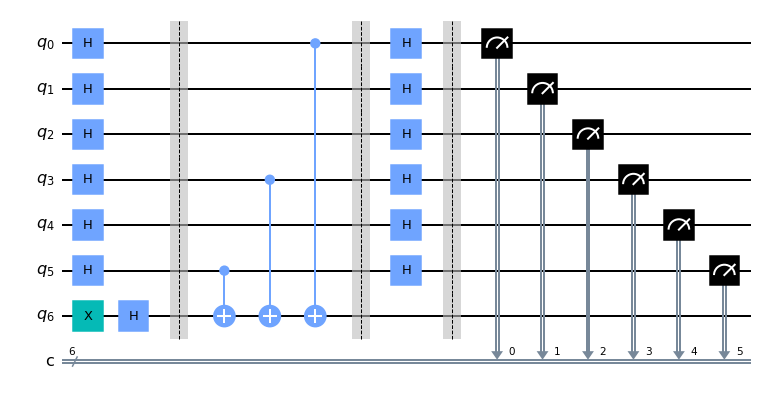

In [12]:
# Take a look to the obtained circuit

circuit.draw(output='mpl')

In [14]:
# The circuit can be simulated: to obtain the correct results we only need one shot

simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator, shots=1).result()
counts = result.get_counts()
print(counts)

{'101001': 1}


In [15]:
# Now the code is generaized for a number of lenght N

number = '1011010'

circuit = QuantumCircuit(len(number)+1, len(number))

circuit.h(range(len(number)))
circuit.x(len(number))
circuit.h(len(number))

for i, yesno in enumerate(reversed(number)):
    if yesno == '1':
        circuit.cx(i, len(number))
        
circuit.h(range(len(number)))

circuit.measure(range(len(number)), range(len(number)))

In [16]:
result = execute(circuit, backend=simulator, shots=1).result()
counts = result.get_counts()
print(counts)

{'1011010': 1}
